In [ ]:
import os
import pandas as pd
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pickle
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from PIL import Image
from sklearn.metrics import classification_report , confusion_matrix
!pip install visualkeras
import visualkeras
mnist=tf.keras.datasets.fashion_mnist
type(mnist)

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)


#train_images=x_train.reshape(x_train.shape[0],28,28,1)
#test_images=x_test.reshape(x_test.shape[0],28,28,1)
#label_images=y_train(y_train.reshape(y_train.shape[0],1))
#label_test=y_test(y_test.reshape(y_test.shape[0],1))
#train_images=train_images/255.0
#model=Sequential()
#model.add(Conv2D(64 ,(3,3),input_shape= train_images.shape[1:]))
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(64,(3,3)))
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Flatten())
#model.add(Dense(64))

#model.add(Dense(10))
#model.add(Activation('sigmoid'))
#model.compile(
#loss='sparse_categorical_crossentropy',
#optimizer=Adam(lr=0.001),
#metrics=['accuracy'])

#model.fit(train_images,test_images,batch_size=32,epochs=3)




4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [ ]:
y_cat_train = to_categorical(y_train, num_classes= 10)
y_cat_test = to_categorical(y_test, num_classes= 10)

In [ ]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
#x_train=x_train/255.0
#x_test=x_test/255
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
#x_train, x_val, y_cat_train, y_val = train_test_split(x_train, y_cat_train, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size= (3,3), padding = 'same', input_shape = (28,28,1), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size= (3,3), padding = 'same', activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate = 0.35))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size= (3,3), padding = 'same', activation= 'relu'))
model.add(Conv2D(filters = 64, kernel_size= (3,3), padding = 'same',  activation= 'relu'))
model.add(Dropout(rate = 0.5))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(rate = 0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(10, activation='softmax'))

#opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
#model.summary()

In [ ]:
#visualkeras.layered_view(model)

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',patience=10)

In [ ]:
history=model.fit(x = x_train, y = y_cat_train, batch_size = 64, epochs = 200, validation_data = (x_test, y_cat_test),callbacks=[early_stop])

Epoch 1/200
938/938 [==============================] - 13s 6ms/step - loss: 1.1437 - accuracy: 0.6050 - val_loss: 0.5324 - val_accuracy: 0.8045
Epoch 2/200
938/938 [==============================] - 5s 6ms/step - loss: 0.5212 - accuracy: 0.8016 - val_loss: 0.4017 - val_accuracy: 0.8531
Epoch 3/200
938/938 [==============================] - 5s 5ms/step - loss: 0.4429 - accuracy: 0.8344 - val_loss: 0.3887 - val_accuracy: 0.8573
Epoch 4/200
938/938 [==============================] - 5s 5ms/step - loss: 0.3971 - accuracy: 0.8516 - val_loss: 0.3905 - val_accuracy: 0.8505
Epoch 5/200
938/938 [==============================] - 5s 6ms/step - loss: 0.3711 - accuracy: 0.8639 - val_loss: 0.3160 - val_accuracy: 0.8887
Epoch 6/200
938/938 [==============================] - 5s 5ms/step - loss: 0.3540 - accuracy: 0.8713 - val_loss: 0.2934 - val_accuracy: 0.8896
Epoch 7/200
938/938 [==============================] - 5s 5ms/step - loss: 0.3358 - accuracy: 0.8739 - val_loss: 0.2930 - val_accuracy: 0.891

In [ ]:
model.save('cnn-model')
history.history

INFO:tensorflow:Assets written to: cnn-model/assets


{'accuracy': [0.7107666730880737,
  0.8119999766349792,
  0.8417666554450989,
  0.8547166585922241,
  0.8650000095367432,
  0.8705000281333923,
  0.8750166893005371,
  0.8791666626930237,
  0.8836333155632019,
  0.8866833448410034,
  0.8884833455085754,
  0.8915166854858398,
  0.8930500149726868,
  0.8955666422843933,
  0.8967666625976562,
  0.8966666460037231,
  0.8982999920845032,
  0.9007333517074585,
  0.9021833539009094,
  0.9021999835968018,
  0.9026666879653931,
  0.9039000272750854,
  0.904449999332428,
  0.9072333574295044,
  0.9055833220481873,
  0.9085999727249146,
  0.9079833626747131,
  0.9071333408355713,
  0.9097999930381775,
  0.9087499976158142,
  0.9100666642189026,
  0.9107333421707153,
  0.9101333618164062,
  0.9122999906539917,
  0.9117666482925415,
  0.913433313369751,
  0.9130333065986633,
  0.9143999814987183,
  0.9144999980926514,
  0.9139833450317383,
  0.912766695022583,
  0.9150833487510681,
  0.916100025177002,
  0.9154000282287598,
  0.9160000085830688,
  

In [ ]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
xc=range(57)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title('train vs val loss')
plt.grid(True)
print( plt.style.available)
plt.style.use(['classic'])


In [ ]:
#def get_image(path):
    #img = cv2.imread(path)
    #eturn  cv2.resize(path, (28,28))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.resize(img, (28,28))
    #img= img.reshape(-1,28,28,1)
    #return  cv2.resize(img, (28,28))



In [ ]:
def prepare(filepath):
     IMG_SIZE=28
     img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
     new_array= cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
     nwe_array=img_array.astype('float32')/255
     return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving d3.jpg to d3.jpg


In [ ]:
#model.predict(prepare('0a30baec-1938-47c5-b495-68a51701b43d.jpg'))
#model.predict(prepare('0add1694-17d0-46ec-a9fc-900da252af41.jpg'))
model.predict(prepare('d3.jpg'))
#model.predict(prepare('0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg'))
#model.predict(prepare('00e745c9-97d9-429d-8c3f-d3db7a2d2991.jpg'))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
out_array=model.predict(prepare('d3.jpg'))
index=np.argmax(out_array)
class_names[index]

'Trouser'

In [ ]:
#plt.figure()
#plt.imshow(get_image('2.jpg'))
#plt.show()

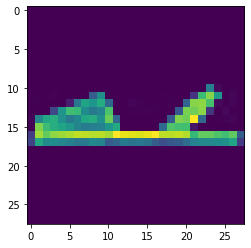

In [ ]:
plt.figure()
plt.imshow(get_image(x_test[111]))
plt.show()

In [ ]:
predictions[111]

array([7.8248199e-14, 7.2981847e-21, 8.5465651e-17, 3.2194909e-23,
       6.6176443e-23, 9.9999976e-01, 1.8851153e-19, 2.8177246e-07,
       3.1107018e-13, 1.8026280e-13], dtype=float32)

In [ ]:
#plt.figure()
#plt.imshow(get_image('0b1cc7a6-be78-45e6-be22-2ad00b107328.jpg'))
#plt.show()

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import torch
from torchvision import datasets, models, transforms